### ARIMA Model

ARIMA model stands for Auto-Regressive Integrated Moving Average.

**Auto Regressive Model**
Auto-regressive models predict future behavior using past behavior where there is some correlation between past and future data. The formula below represents the autoregressive model. It is from "https://www.simplilearn.com/tutorials/python-tutorial/time-series-analysis-in-python"

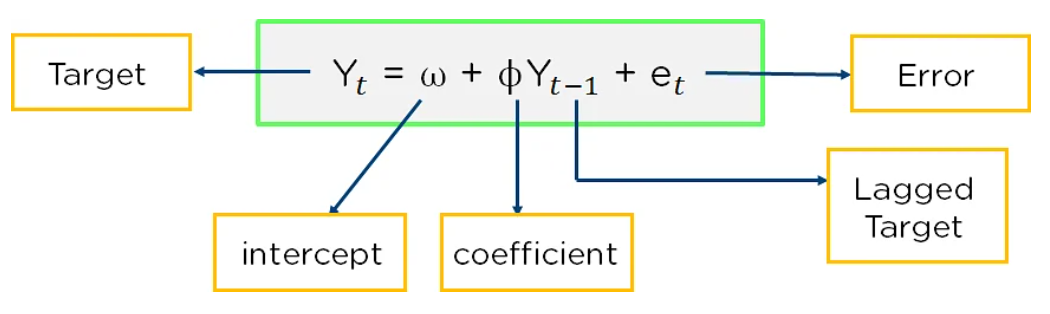

**Moving Average**
Moving Average is a statistical method that takes the updated average of values to help cut down on noise. 

**Integration**
Integration is the difference bewteen present and previous observations. It is used to make the time series stationary.

A standard notation is used of ARIMA(p, d, q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

- **p**: The number of lag observations included in the model, also called the lag order;
- **d**: The number of times that the raw observations are differenced, also called the degree of differencing;
- **q**: The size of the moving average window, also called the order of moving average.

The general process for ARIMA models is the following:
- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

In [99]:
from datetime import datetime
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [188]:
import pandas as pd
df = pd.read_csv('C:/Users/xiaoj/Desktop/CS/datasets/shampoo.csv',index_col = 0, date_parser = parser,squeeze = True)
df.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

### Testing for Stationarity

#### Method 1: Using Plot

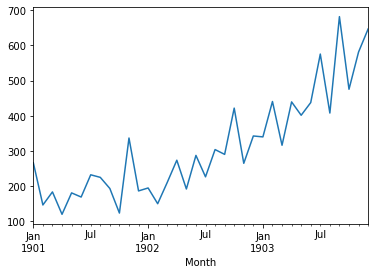

In [180]:
# Stationary-Method 1: using plot
df.index = df.index.to_period('M')
df.plot()

It can be seen that the Shampoo Sales dataset has a clear trend. This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

#### Method 2: Statsmodels.tsa.stattools

In [182]:
# Stationary-Method 1: from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('C:/Users/xiaoj/Desktop/CS/datasets/shampoo.csv',index_col = 0, date_parser = parser)

from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Sales'])

# H0: It is non stationary
# H1: It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistic', 'p-value', '#Lags used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print('P value is less than 0.05 that means we can reject the null hypothesis. Therefore we can conclude that data is stationary')
    else:
        print('Weak evidence against null hypothesis that means time series is non-stationary.')

In [183]:
adfuller_test(df['Sales'])

ADF test statistic:3.0601420836411775
p-value:1.0
#Lags used:10
Number of Observations Used:25
Weak evidence against null hypothesis that means time series is non-stationary.


### Differencing

Differencing helps remove the changes from the data and make data stationary.

In [185]:
# We have monthly data so let us try a shift value from 1 to 12
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(1)

# Let's check if the data now is stationary
# Since the data was shifted, there are NaN so we should remove NaN values
adfuller_test(df['Seasonal First Difference'].dropna())

ADF test statistic:-7.249074055553857
p-value:1.7998574141686703e-10
#Lags used:1
Number of Observations Used:33
P value is less than 0.05 that means we can reject the null hypothesis. Therefore we can conclude that data is stationary


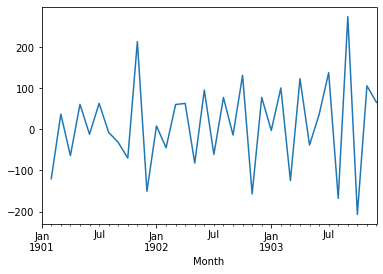

In [186]:
df['Seasonal First Difference'].plot()

### Auto Regressive Model

1. Partial Auto Correlation Function: Takes into account the impact of direct variables only;
2. Auto Correlation Function: Takes into account the impact of all the variables(direct + indirect)

C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


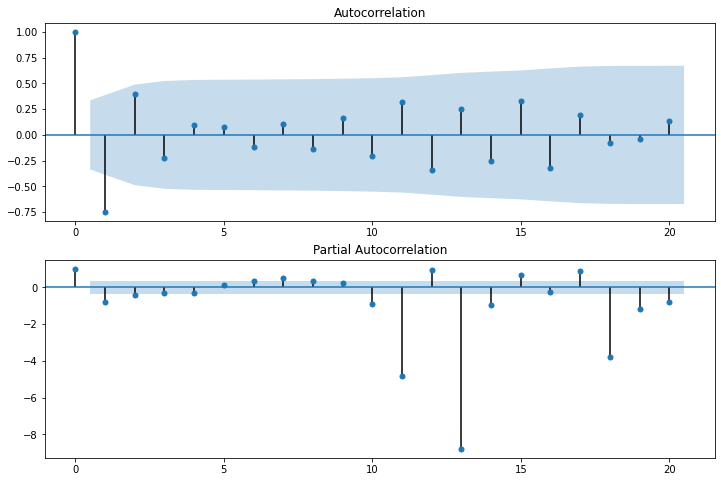

In [187]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize = (12,8))

# 211 means 2 rows 1 column and the first
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[2:], lags = 20, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[2:],lags = 20, ax = ax2)

In the graphs above, each spike(lag) which is above the dashed area considers to be statistically significant.

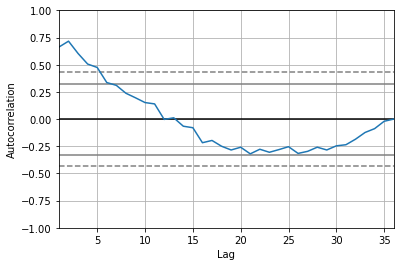

In [189]:
# check the autocorrelation and check p value
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)

In [190]:
# Fit the ARIMA(5,1,0) model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df, order=(2,1,0))
model_fit = model.fit()
model_fit.summary()

C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -200.188
Date:                Wed, 12 Jan 2022   AIC                            406.376
Time:                        19:15:21   BIC                            411.042
Sample:                    01-01-1901   HQIC                           407.987
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9139      0.225     -4.067      0.000      -1.354      -0.473
ar.L2         -0.2630      0.189     -1.392      0.164      -0.633       0.107
sigma2      5311.7174   1383.504      3.839      0.000    2600.099    8023.335
===================================================================================
Ljung-Box (Q):                       34.82   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.43   Prob(JB):                         0.54
Heteroskedasticity (H):               1.48   Skew:                             0.35
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This summarizes the coefficient values used as well as the skill of the fit on the in-sample obervations.

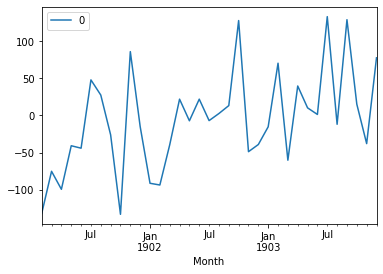

In [32]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

This line plot of the residual errors suggested that there may still be some trend information not captured by the model.

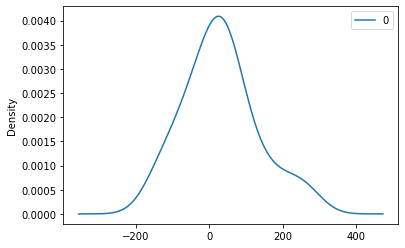

In [192]:
residuals.plot(kind = 'kde')

The density plot of residual error values suggested that the errors are Gaussian, but may not be centered on zero.

In [193]:
residuals.describe()

,0
count,36.000000
mean,30.853773
std,100.204463
min,-148.479518
25%,-33.426350
50%,29.010085
75%,73.425773
max,266.000000


This distribution showed that there is a bias in the prediction(a non-zero mean in the residuals).

C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


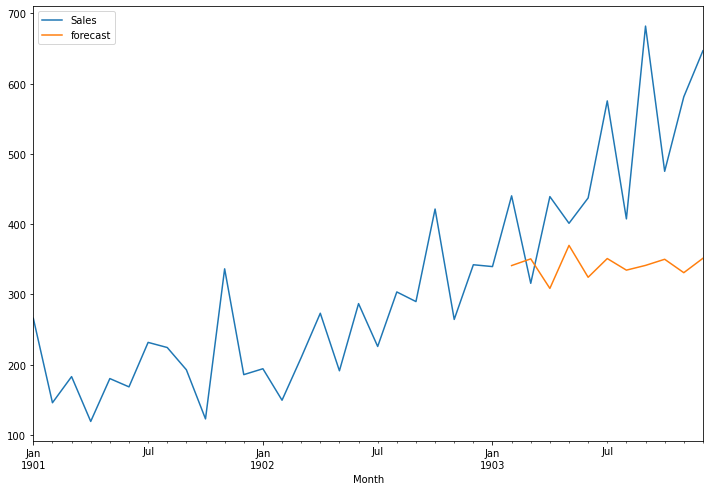

In [143]:
model = ARIMA(df['Sales'], order=(5,1,0))
model_fit = model.fit()
df['forecast'] = model_fit.predict(start = 25, end = 100, dynamic = True)
df[['Sales','forecast']].plot(figsize = (12,8))

For non-seasonal data,the following parameters should be inputted:
- AR specification
- Integration order
- MA specification

It can be found that we are not getting good results using ARIA because our data has seasonal behavior, so let's try using seasonal ARIMA.

In [160]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (5,1,0), seasonal_order = (5,1,0,12))
results = model.fit()

C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\xiaoj\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Note above the seasonal_order tuples which takes the following format:
- Seasonal AR specification
- Seasonal Integration order
- Seasonal MA
- Seasonal periodicity

In [154]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(5, 1, 0)x(5, 1, 0, 12)   Log Likelihood                -136.561
Date:                            Wed, 12 Jan 2022   AIC                            295.122
Time:                                    14:59:39   BIC                            307.613
Sample:                                01-01-1901   HQIC                           298.264
                                     - 12-01-1903                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1825      0.806     -1.467      0.142      -2.762       0.397
ar.L2         -0.7082      0.781     -0.907      0.364      -2.239       0.822
ar.L3         -0.3909      0.809     -0.483      0.629      -1.977       1.195
ar.L4         -0.0252      1.145     -0.022      0.982      -2.270       2.220
ar.L5          0.2338      0.486      0.481      0.631      -0.719       1.187
ar.S.L12       0.2017    441.649      0.000      1.000    -865.415     865.819
ar.S.L24       1.4299    366.227      0.004      0.997    -716.362     719.222
ar.S.L36      -0.0526    728.307  -7.22e-05      1.000   -1427.507    1427.402
ar.S.L48      -0.4707    372.599     -0.001      0.999    -730.752     729.811
ar.S.L60      -0.1866    385.516     -0.000      1.000    -755.783     755.410
sigma2        88.6100      1.815     48.832      0.000      85.053      92.166
===================================================================================
Ljung-Box (Q):                       14.34   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.89   Prob(JB):                         0.66
Heteroskedasticity (H):               1.17   Skew:                             0.46
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.72e+20. Standard errors may be unstable.
"""

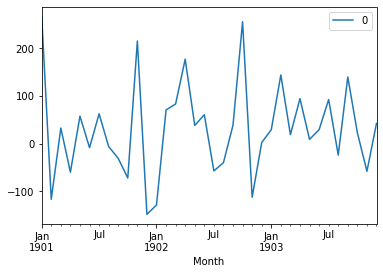

In [155]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

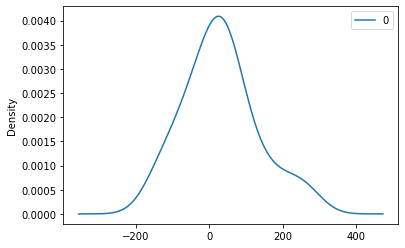

In [156]:
residuals.plot(kind = 'kde')

In [157]:
residuals.describe()

,0
count,36.000000
mean,30.853773
std,100.204463
min,-148.479518
25%,-33.426350
50%,29.010085
75%,73.425773
max,266.000000


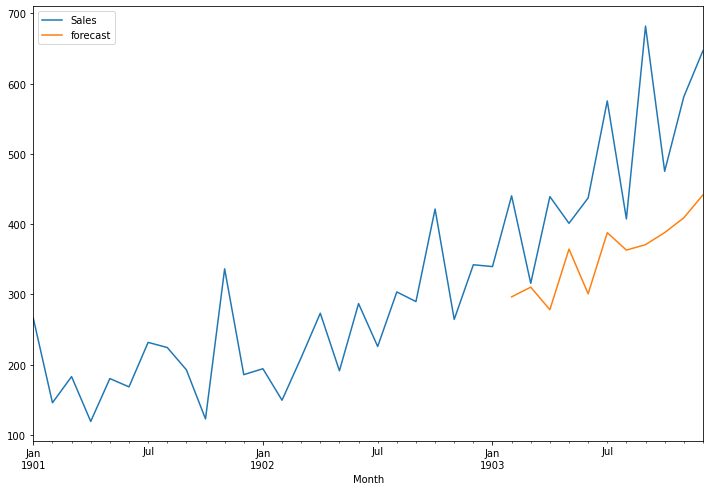

In [171]:
df['forecast'] = results.predict(start = 25, end = 36, dynamic = True)
df[['Sales','forecast']].plot(figsize = (12,8))

In [75]:
size = int(len(df)*0.66)
train, test = df[0:size], df[size:len(df)]
history = [x for x in train]
history

[266.0,
 145.9,
 183.1,
 119.3,
 180.3,
 168.5,
 231.8,
 224.5,
 192.8,
 122.9,
 336.5,
 185.9,
 194.3,
 149.5,
 210.1,
 273.3,
 191.4,
 287.0,
 226.0,
 303.6,
 289.9,
 421.6,
 264.5]

In [76]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
predictions

[343.27161943592046,
 293.3288662498659,
 368.66835442187244,
 335.04427839850365,
 363.2207313124907,
 357.643760110361,
 443.04661171043693,
 378.36548737625424,
 459.4131945483514,
 526.8893435732299,
 457.2310703538718,
 672.9137422664892,
 531.5409695146406]

In [80]:
# evaluate forecasts
from sklearn.metrics import mean_squared_error
import math 
rmse = math.sqrt(mean_squared_error(test, predictions))
rmse

89.02124808177632

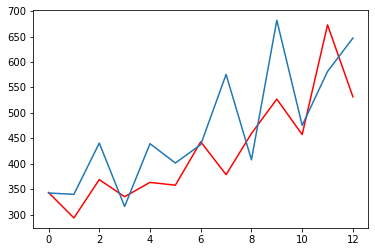

In [96]:
from matplotlib import pyplot
pyplot.plot(predictions, color = 'red')
pyplot.plot(test.values)

A line plot showed the expected values(blue) compared to the predictions, and they showed same trend and are in the correct scale.

### Forecasting for Next 5 Years using SARIMA

In [161]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0, 60)]
future_dates

[Timestamp('1903-12-01 00:00:00'),
 Timestamp('1904-01-01 00:00:00'),
 Timestamp('1904-02-01 00:00:00'),
 Timestamp('1904-03-01 00:00:00'),
 Timestamp('1904-04-01 00:00:00'),
 Timestamp('1904-05-01 00:00:00'),
 Timestamp('1904-06-01 00:00:00'),
 Timestamp('1904-07-01 00:00:00'),
 Timestamp('1904-08-01 00:00:00'),
 Timestamp('1904-09-01 00:00:00'),
 Timestamp('1904-10-01 00:00:00'),
 Timestamp('1904-11-01 00:00:00'),
 Timestamp('1904-12-01 00:00:00'),
 Timestamp('1905-01-01 00:00:00'),
 Timestamp('1905-02-01 00:00:00'),
 Timestamp('1905-03-01 00:00:00'),
 Timestamp('1905-04-01 00:00:00'),
 Timestamp('1905-05-01 00:00:00'),
 Timestamp('1905-06-01 00:00:00'),
 Timestamp('1905-07-01 00:00:00'),
 Timestamp('1905-08-01 00:00:00'),
 Timestamp('1905-09-01 00:00:00'),
 Timestamp('1905-10-01 00:00:00'),
 Timestamp('1905-11-01 00:00:00'),
 Timestamp('1905-12-01 00:00:00'),
 Timestamp('1906-01-01 00:00:00'),
 Timestamp('1906-02-01 00:00:00'),
 Timestamp('1906-03-01 00:00:00'),
 Timestamp('1906-04-

In [163]:
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
1908-07-01,NaN,NaN,NaN
1908-08-01,NaN,NaN,NaN
1908-09-01,NaN,NaN,NaN
1908-10-01,NaN,NaN,NaN
1908-11-01,NaN,NaN,NaN


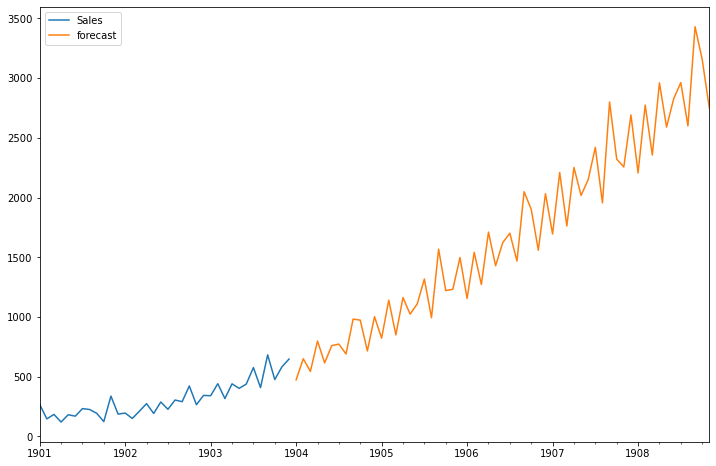

In [174]:
future_df = pd.concat([df, future_datest_df])
future_df['forecast'] = results.predict(start = 36, end = 97, dynamic = True)
future_df[['Sales','forecast']].plot(figsize = (12,8))